Task:\
-Use hp.synalm to generate 1000 Power spectra for TT EE TE BB\
-Find average and standard deviation for Cl\
-Check TT matches Cosmic variance\
-Find the mode which does not fit the variance formula and find how to calculate it

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import camb
import healpy as hp
from camb import model, initialpower

planck2018pars = camb.read_ini("planck_2018.ini")
planck2018 = camb.get_results(planck2018pars)

In [2]:
# unnormalised Cl
powers = planck2018.get_cmb_power_spectra(planck2018pars, CMB_unit="muK", raw_cl=True)

# total power spectrum
Cl_Total = powers["total"]

# l starts from 0 (monopole)
lmax = Cl_Total.shape[0] - 1
# l steps
l = np.arange(lmax + 1)

In [3]:
TrueTT = Cl_Total[:, 0]
TrueEE = Cl_Total[:, 1]
TrueBB = Cl_Total[:, 2]
TrueTE = Cl_Total[:, 3]
almT, almE, almB = hp.synalm(
    [TrueTT, TrueEE, TrueBB, TrueTE],
    new=True,
)
genCl = hp.alm2cl([almT, almE, almB])

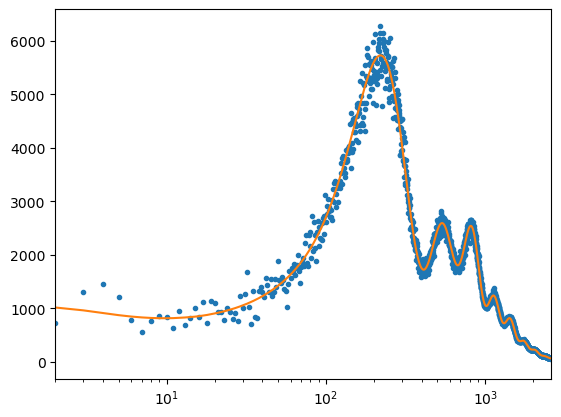

In [21]:
# This is for 1 generation of the power spectrum
plt.plot(l, genCl[0, :] * l * (l + 1) / (2 * np.pi), ".")
plt.plot(l, TrueTT * l * (l + 1) / (2 * np.pi))
plt.xlim(2, lmax)
plt.xscale("log")
plt.show()

In [4]:
TT = []
EE = []
BB = []
TE = []

In [5]:
# writing a loop for 1000
for i in range(1000):
    almT, almE, almB = hp.synalm(
        [TrueTT, TrueEE, TrueBB, TrueTE],
        new=True,
    )
    genCl = hp.alm2cl([almT, almE, almB])
    TT.append(genCl[0, :])
    EE.append(genCl[1, :])
    BB.append(genCl[2, :])
    TE.append(genCl[3, :])

In [6]:
TT = np.array(TT)
EE = np.array(EE)
BB = np.array(BB)
TE = np.array(TE)

In [7]:
meanTT = np.mean(TT, axis=0)
meanEE = np.mean(EE, axis=0)
meanBB = np.mean(BB, axis=0)
meanTE = np.mean(TE, axis=0)

sdTT = np.std(TT, axis=0)
sdEE = np.std(EE, axis=0)
sdBB = np.std(BB, axis=0)
sdTE = np.std(TE, axis=0)

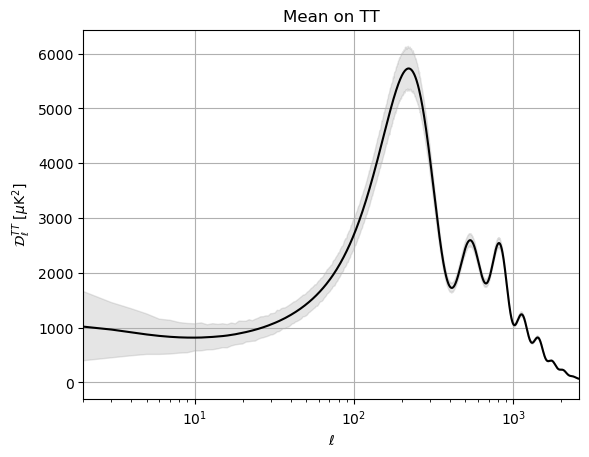

In [24]:
plt.plot(l, TrueTT * l * (l + 1) / (2 * np.pi), color="black")
plt.fill_between(
    l,
    (meanTT + sdTT) * l * (l + 1) / (2 * np.pi),
    (meanTT - sdTT) * l * (l + 1) / (2 * np.pi),
    alpha=0.2,
    color="grey",
)
plt.xlim(2, lmax)
plt.grid()
plt.xlabel("$\ell$")
plt.ylabel("$\mathcal{D}^{TT}_\ell$ [$\mu{\\rm K}^2$]")
plt.xscale("log")
plt.title("Mean on TT")
plt.show()

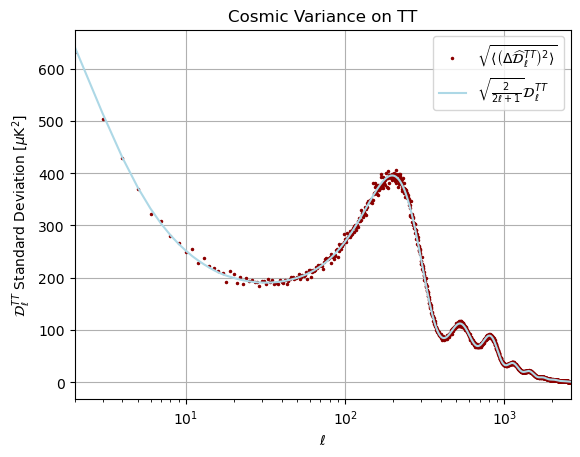

In [26]:
plt.plot(
    l,
    sdTT * l * (l + 1) / (2 * np.pi),
    ".",
    markersize=3,
    color="DarkRed",
    label="$\\sqrt{\\langle\\left(\\Delta\\widehat{\\mathcal{D}}_\\ell^{TT}\\right)^2\\rangle}$",
)
plt.plot(
    l,
    np.sqrt(2 / (2 * l + 1)) * TrueTT * l * (l + 1) / (2 * np.pi),
    color="LightBlue",
    label="$\\sqrt{\\frac{2}{2\\ell+1}}\\mathcal{D}^{TT}_\\ell$",
)
plt.xlim(2, lmax)
plt.xscale("log")
# plt.yscale("log")
plt.xlabel("$\ell$")
plt.ylabel("$\\mathcal{D}^{TT}_\\ell$ Standard Deviation [$\mu{\\rm K}^2$]")
plt.grid()
plt.title("Cosmic Variance on TT")
plt.legend()
plt.show()

In [8]:
mean = np.array([meanTT, meanEE, meanBB, meanTE])
sd = np.array([sdTT, sdEE, sdBB, sdTE])

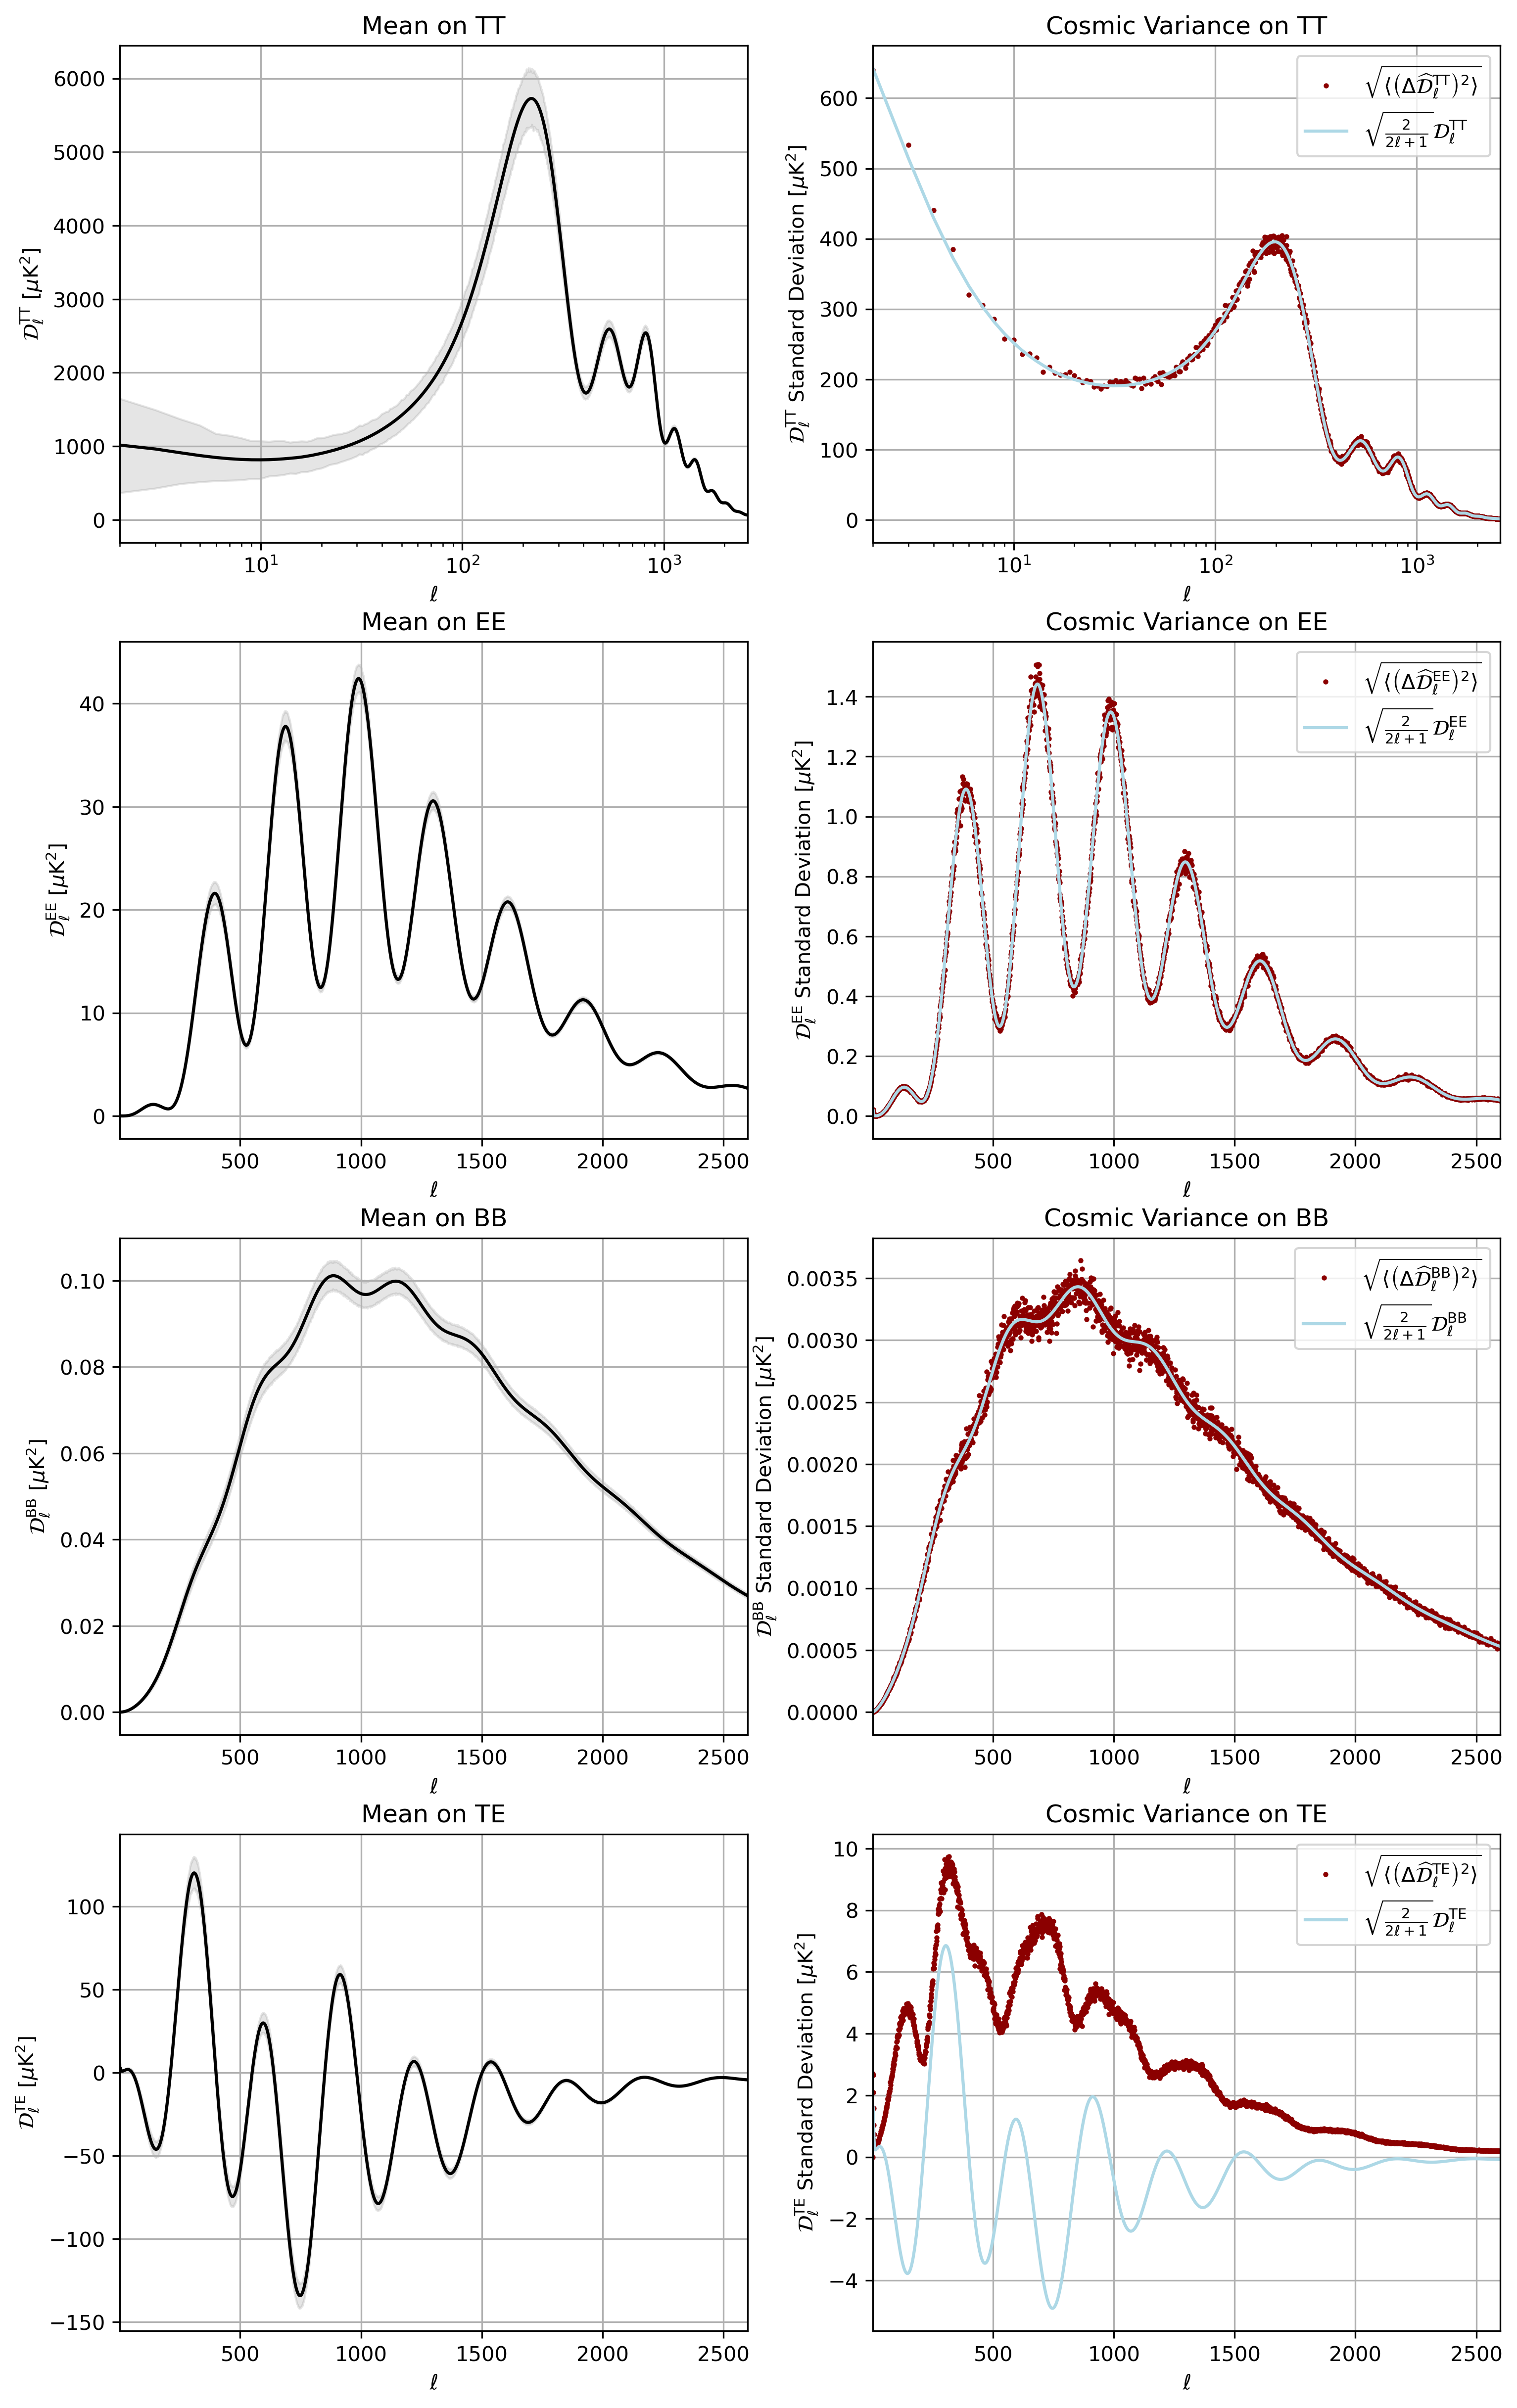

In [16]:
# Generating figures for all power spectra
fig = plt.figure(figsize=(12, 20), dpi=300)
for pindx, ll in zip(range(4), ["TT", "EE", "BB", "TE"]):
    # mean spectrum plot
    ax1 = fig.add_subplot(4, 2, 2 * pindx + 1)
    ax1.set_xlim(2, lmax)
    ax1.grid()
    ax1.set_xlabel("$\ell$")
    ax1.set_ylabel("$\mathcal{D}^{\\rm " + ll + "}_\ell$ [$\mu{\\rm K}^2$]")
    ax1.plot(l, Cl_Total[:, pindx] * l * (l + 1) / (2 * np.pi), color="black")
    ax1.fill_between(
        l,
        (mean[pindx, :] + sd[pindx, :]) * l * (l + 1) / (2 * np.pi),
        (mean[pindx, :] - sd[pindx, :]) * l * (l + 1) / (2 * np.pi),
        alpha=0.2,
        color="grey",
    )
    ax1.set_title(r"Mean on %s" % (ll))

    # variance plot
    ax2 = fig.add_subplot(4, 2, 2 * pindx + 2)
    ax2.set_xlim(2, lmax)
    # ax2.set_xscale("log")
    ax2.grid()
    ax2.set_xlabel("$\ell$")
    ax2.set_ylabel(
        "$\mathcal{D}^{\\rm " + ll + "}_\ell$ Standard Deviation [$\mu{\\rm K}^2$]"
    )
    ax2.plot(
        l,
        sd[pindx, :] * l * (l + 1) / (2 * np.pi),
        ".",
        markersize=3,
        color="DarkRed",
        label="$\\sqrt{\\langle\\left(\\Delta\\widehat{\\mathcal{D}}_\\ell^{\\rm "
        + ll
        + "}\\right)^2\\rangle}$",
    )
    ax2.plot(
        l,
        np.sqrt(2 / (2 * l + 1)) * Cl_Total[:, pindx] * l * (l + 1) / (2 * np.pi),
        color="LightBlue",
        label="$\\sqrt{\\frac{2}{2\\ell+1}}\\mathcal{D}_\\ell^{\\rm " + ll + "}$",
    )
    ax2.set_title(r"Cosmic Variance on %s" % (ll))
    ax2.legend()

    if ll == "TT":
        ax1.set_xscale("log")
        ax2.set_xscale("log")
plt.savefig("Output/Diag_variance.png", dpi=300)
plt.show()

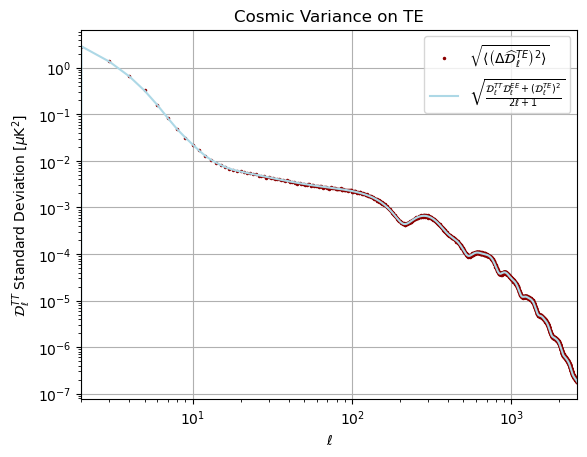

In [10]:
# fitting TE
plt.plot(
    l,
    sdTE,
    ".",
    markersize=3,
    color="DarkRed",
    label="$\\sqrt{\\langle\\left(\\Delta\\widehat{\\mathcal{D}}_\\ell^{TE}\\right)^2\\rangle}$",
)
fit = np.sqrt((TrueTE**2 + TrueTT * TrueEE) / (2 * l + 1))
fit[0] = 0
fit[1] = 0
plt.plot(
    l,
    fit,
    color="LightBlue",
    label="$\\sqrt{\\frac{\\mathcal{D}^{TT}_\\ell\\mathcal{D}^{EE}_\\ell+(\\mathcal{D}^{TE}_\\ell)^2}{2\\ell+1}}$",
)
plt.xlim(2, lmax)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\ell$")
plt.ylabel("$\\mathcal{D}^{TT}_\\ell$ Standard Deviation [$\mu{\\rm K}^2$]")
plt.grid()
plt.title("Cosmic Variance on TE")
plt.legend()
plt.savefig("Output/TE.png", dpi=300)
plt.show()

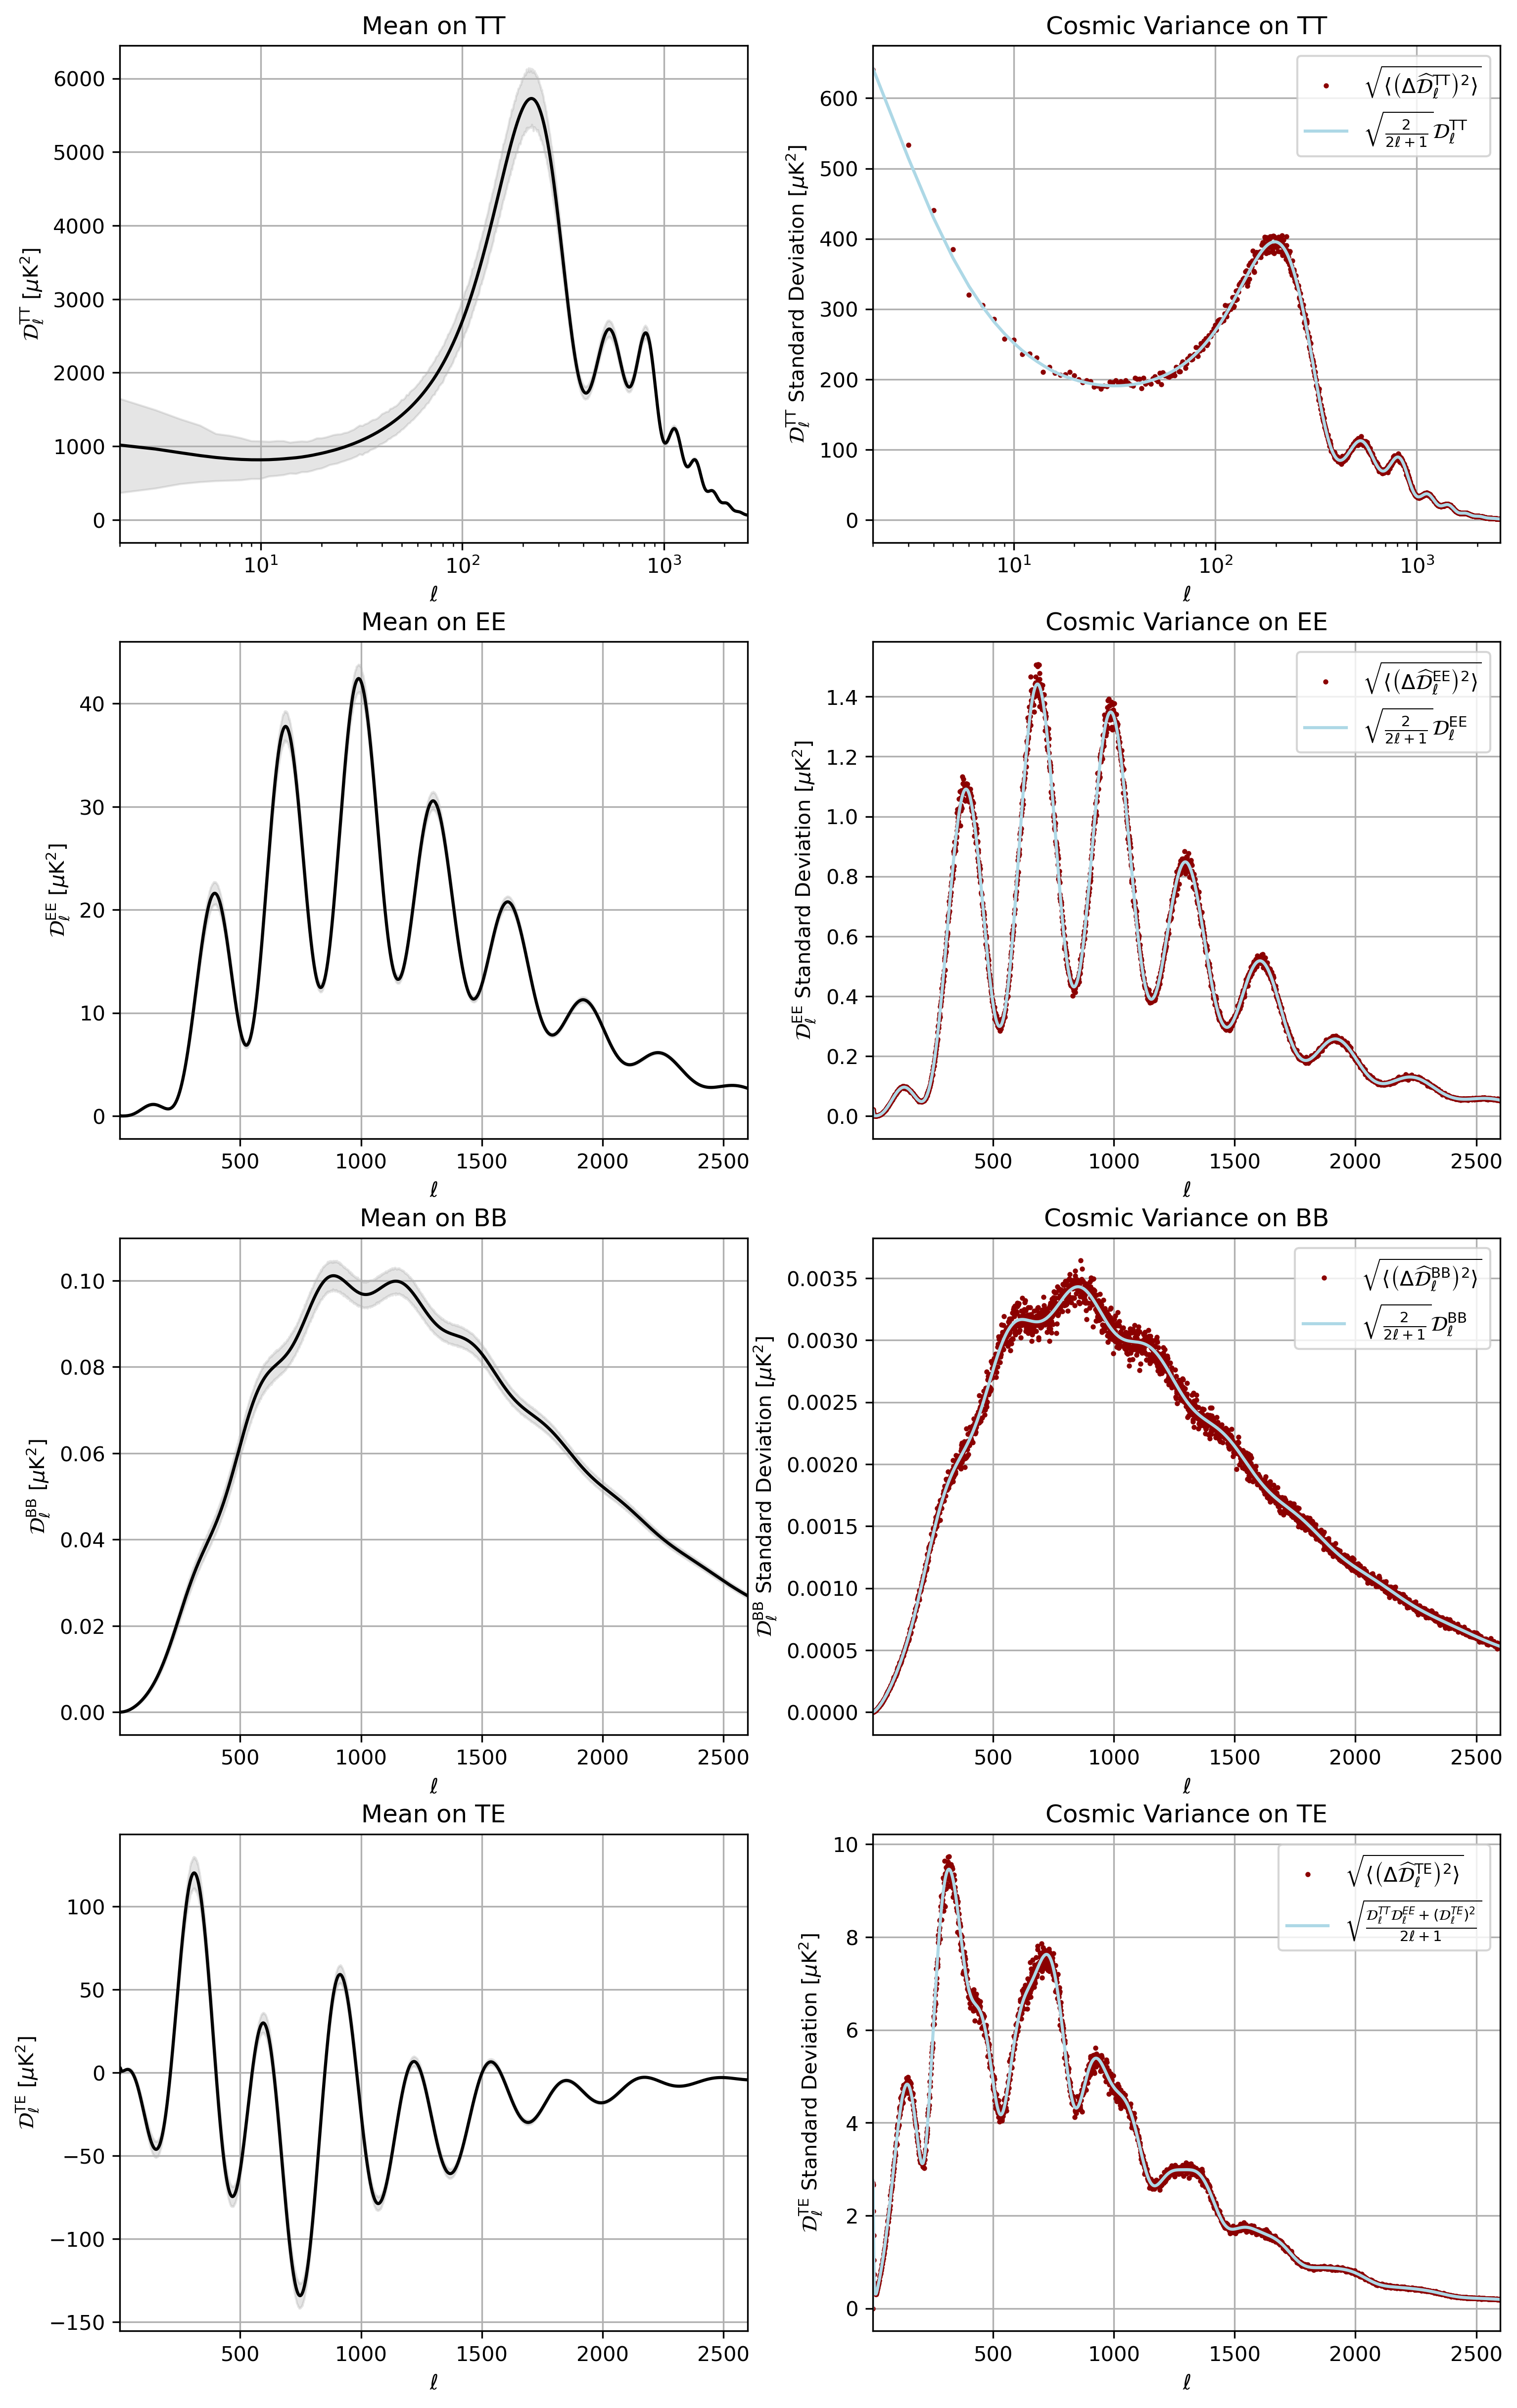

In [15]:
# Generating figures for all power spectra
fig = plt.figure(figsize=(12, 20), dpi=300)
for pindx, ll in zip(range(4), ["TT", "EE", "BB", "TE"]):
    # mean spectrum plot
    ax1 = fig.add_subplot(4, 2, 2 * pindx + 1)
    ax1.set_xlim(2, lmax)
    ax1.grid()
    ax1.set_xlabel("$\ell$")
    ax1.set_ylabel("$\mathcal{D}^{\\rm " + ll + "}_\ell$ [$\mu{\\rm K}^2$]")
    ax1.plot(l, Cl_Total[:, pindx] * l * (l + 1) / (2 * np.pi), color="black")
    ax1.fill_between(
        l,
        (mean[pindx, :] + sd[pindx, :]) * l * (l + 1) / (2 * np.pi),
        (mean[pindx, :] - sd[pindx, :]) * l * (l + 1) / (2 * np.pi),
        alpha=0.2,
        color="grey",
    )
    ax1.set_title(r"Mean on %s" % (ll))

    ax2 = fig.add_subplot(4, 2, 2 * pindx + 2)
    ax2.set_xlim(2, lmax)
    # ax2.set_xscale("log")
    ax2.grid()
    ax2.set_xlabel("$\ell$")
    ax2.set_ylabel(
        "$\mathcal{D}^{\\rm " + ll + "}_\ell$ Standard Deviation [$\mu{\\rm K}^2$]"
    )
    ax2.plot(
        l,
        sd[pindx, :] * l * (l + 1) / (2 * np.pi),
        ".",
        markersize=3,
        color="DarkRed",
        label="$\\sqrt{\\langle\\left(\\Delta\\widehat{\\mathcal{D}}_\\ell^{\\rm "
        + ll
        + "}\\right)^2\\rangle}$",
    )
    ax2.set_title(r"Cosmic Variance on %s" % (ll))

    # variance plot
    if ll == "TE":
        ax2.plot(
            l,
            fit * l * (l + 1) / (2 * np.pi),
            color="LightBlue",
            label="$\\sqrt{\\frac{\\mathcal{D}^{TT}_\\ell\\mathcal{D}^{EE}_\\ell+(\\mathcal{D}^{TE}_\\ell)^2}{2\\ell+1}}$",
        )
    else:
        ax2.plot(
            l,
            np.sqrt(2 / (2 * l + 1)) * Cl_Total[:, pindx] * l * (l + 1) / (2 * np.pi),
            color="LightBlue",
            label="$\\sqrt{\\frac{2}{2\\ell+1}}\\mathcal{D}_\\ell^{\\rm " + ll + "}$",
        )
    if ll == "TT":
        ax1.set_xscale("log")
        ax2.set_xscale("log")
    ax2.legend()
plt.savefig("Output/Final_variance.png", dpi=300)
plt.show()